In [6]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
%matplotlib inline

In [7]:
data = pd.read_csv('reviews4.csv')
data.head()

,Unnamed: 0,text,business_id,date,review_id,cool,user_id,funny,useful,review_count,is_open,attributes,categories,yelping_since,fans,review_star,business_star,user_star
0,0,The food is always great here. The service fro...,8zehGz9jnxPqXtOc7KaJxA,2011-07-28 18:05:01,sjm_uUcQVxab_EeLCqsYLg,0,0kA0PAJ8QFMeveQWHFqz2A,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2010-10-12 00:40:13,2,4.0,4.5,4.15
1,1,Brasserie zero zero... we were hoping for a te...,8zehGz9jnxPqXtOc7KaJxA,2018-08-04 20:52:32,eiAeuhR3kurAO8rAt_rhlg,0,7zEJt0NVl-lMiMwkCsvteg,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2012-07-15 22:43:57,0,2.0,4.5,3.56
2,2,I absolutely love this restaurant. I've been c...,8zehGz9jnxPqXtOc7KaJxA,2014-04-01 02:29:55,Ye8Uh3aBfGoEWgC7DEI8YA,1,32HQqHGHqcDnNteK835C-Q,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2008-02-15 17:19:41,6,5.0,4.5,4.25
3,3,"I love you, Lucile's. \r\n\r\nI love your chai...",or-Kyw7kmNin1pWbu2RLJw,2011-07-28 23:27:24,CkDybuShgzu5QD1n5KvXjQ,1,32HQqHGHqcDnNteK835C-Q,1,1,628,1,"{'RestaurantsReservations': 'False', 'Business...","Cajun/Creole, Restaurants, Breakfast & Brunch,...",2008-02-15 17:19:41,6,5.0,4.0,4.25
4,4,"Pasta Jays, what can I say? You knocked my soc...",eRlc-vfvnl9ai8RydqZfOw,2011-07-28 23:05:38,D2kXXOT9Fry0nK_UpI7HWg,1,32HQqHGHqcDnNteK835C-Q,0,2,516,1,"{'GoodForKids': 'True', 'HasTV': 'True', 'Alco...","Restaurants, Pizza, Italian",2008-02-15 17:19:41,6,3.0,3.5,4.25


In [5]:
review_count_min = data.review_count.min()
review_count_max = data.review_count.max()
print(review_count_min,review_count_max)

515 1491


In [22]:
# pd.value_counts(data.user_id.unique())
pd.value_counts(data.review_star.unique())

1.0    1
3.0    1
5.0    1
2.0    1
4.0    1
dtype: int64

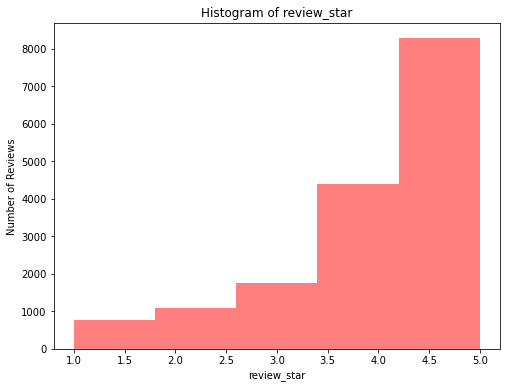

In [21]:
num_bins = 5
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(data["review_star"], num_bins, facecolor='red', alpha=0.5)
plt.xlabel('review_star')
plt.ylabel('Number of Reviews')
plt.title('Histogram of review_star')
plt.show();

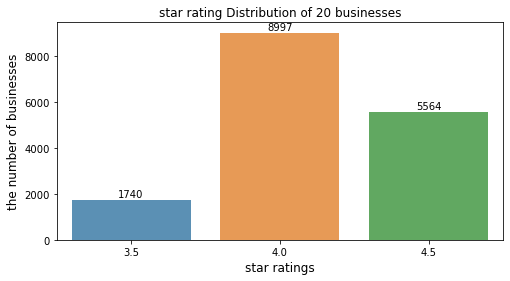

In [24]:
#Get the distribution of the ratings
x=data['business_star'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("star rating Distribution of 20 businesses")
plt.ylabel('the number of businesses', fontsize=12)
plt.xlabel('star ratings', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
   height = rect.get_height()
   ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

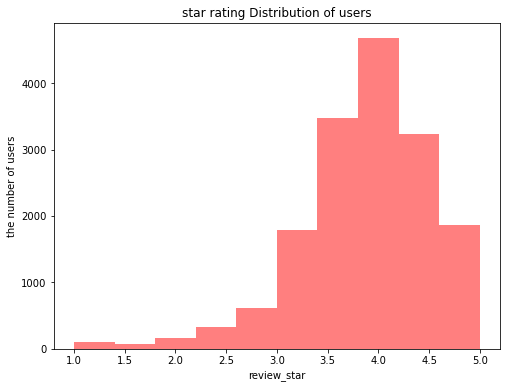

In [28]:
num_bins = 10
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(data["user_star"], num_bins, facecolor='red', alpha=0.5)
plt.xlabel('review_star')
plt.ylabel('the number of users')
plt.title('star rating Distribution of users')
plt.show();

In [33]:
print(data[['cool','funny','useful','review_star']].describe())

               cool         funny        useful   review_star
count  16301.000000  16301.000000  16301.000000  16301.000000
mean       0.308386      0.203914      0.652659      4.122999
std        1.205782      0.908318      1.591684      1.139378
min        0.000000      0.000000      0.000000      1.000000
25%        0.000000      0.000000      0.000000      4.000000
50%        0.000000      0.000000      0.000000      5.000000
75%        0.000000      0.000000      1.000000      5.000000
max       75.000000     51.000000     76.000000      5.000000


Text(0.5, 1.0, 'Time series of review number for the hottest restaurants')

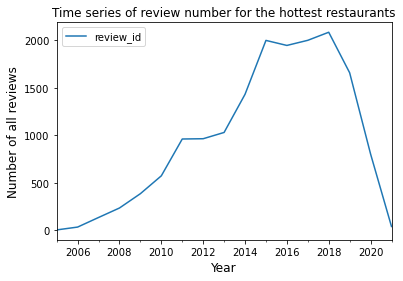

In [38]:
##plot the total number of reviews from 2005 to 2018 for the hottest restaurants
data['datetime']=pd.to_datetime(data['date'].values)
df=[]
df=data[['review_id','datetime']]

df.set_index('datetime').resample('A').count().plot()
plt.ylabel('Number of all reviews',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Time series of review number for the hottest restaurants")